In [1]:
# Generic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
bank_df=pd.read_csv("UnivBank.csv")

In [10]:
bank_df.shape

(5000, 14)

In [13]:
bank_df['ZIP Code'].nunique()

467

In [4]:
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
bank_df.dtypes.value_counts()

int64      13
float64     1
dtype: int64

In [6]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
bank_df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [18]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [45]:
bank_df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [35]:
num_col=bank_df.select_dtypes(include=np.number).columns
num_col=[i for i in num_col if i not in ['ID','CreditCard']]

In [36]:
# Get discrete numerical value
num_col_disc=[]
num_col_medium=[]
num_col_cont=[]
print("Attributes with their distinct count and their classification")
for i in num_col:
    if bank_df[i].nunique() <=10:
        print(i,"==",bank_df[i].nunique(),"== disc")
        num_col_disc.append(i)
    elif (bank_df[i].nunique() >10 and bank_df[i].nunique() <100):
        num_col_medium.append(i)    
        print(i,"==",bank_df[i].nunique(),"== medium")
    else:
        num_col_cont.append(i)
        print(i,"==",bank_df[i].nunique(),"== cont")

Attributes with their distinct count and their classification
Age == 45 == medium
Experience == 47 == medium
Income == 162 == cont
ZIP Code == 467 == cont
Family == 4 == disc
CCAvg == 108 == cont
Education == 3 == disc
Mortgage == 347 == cont
Personal Loan == 2 == disc
Securities Account == 2 == disc
CD Account == 2 == disc
Online == 2 == disc


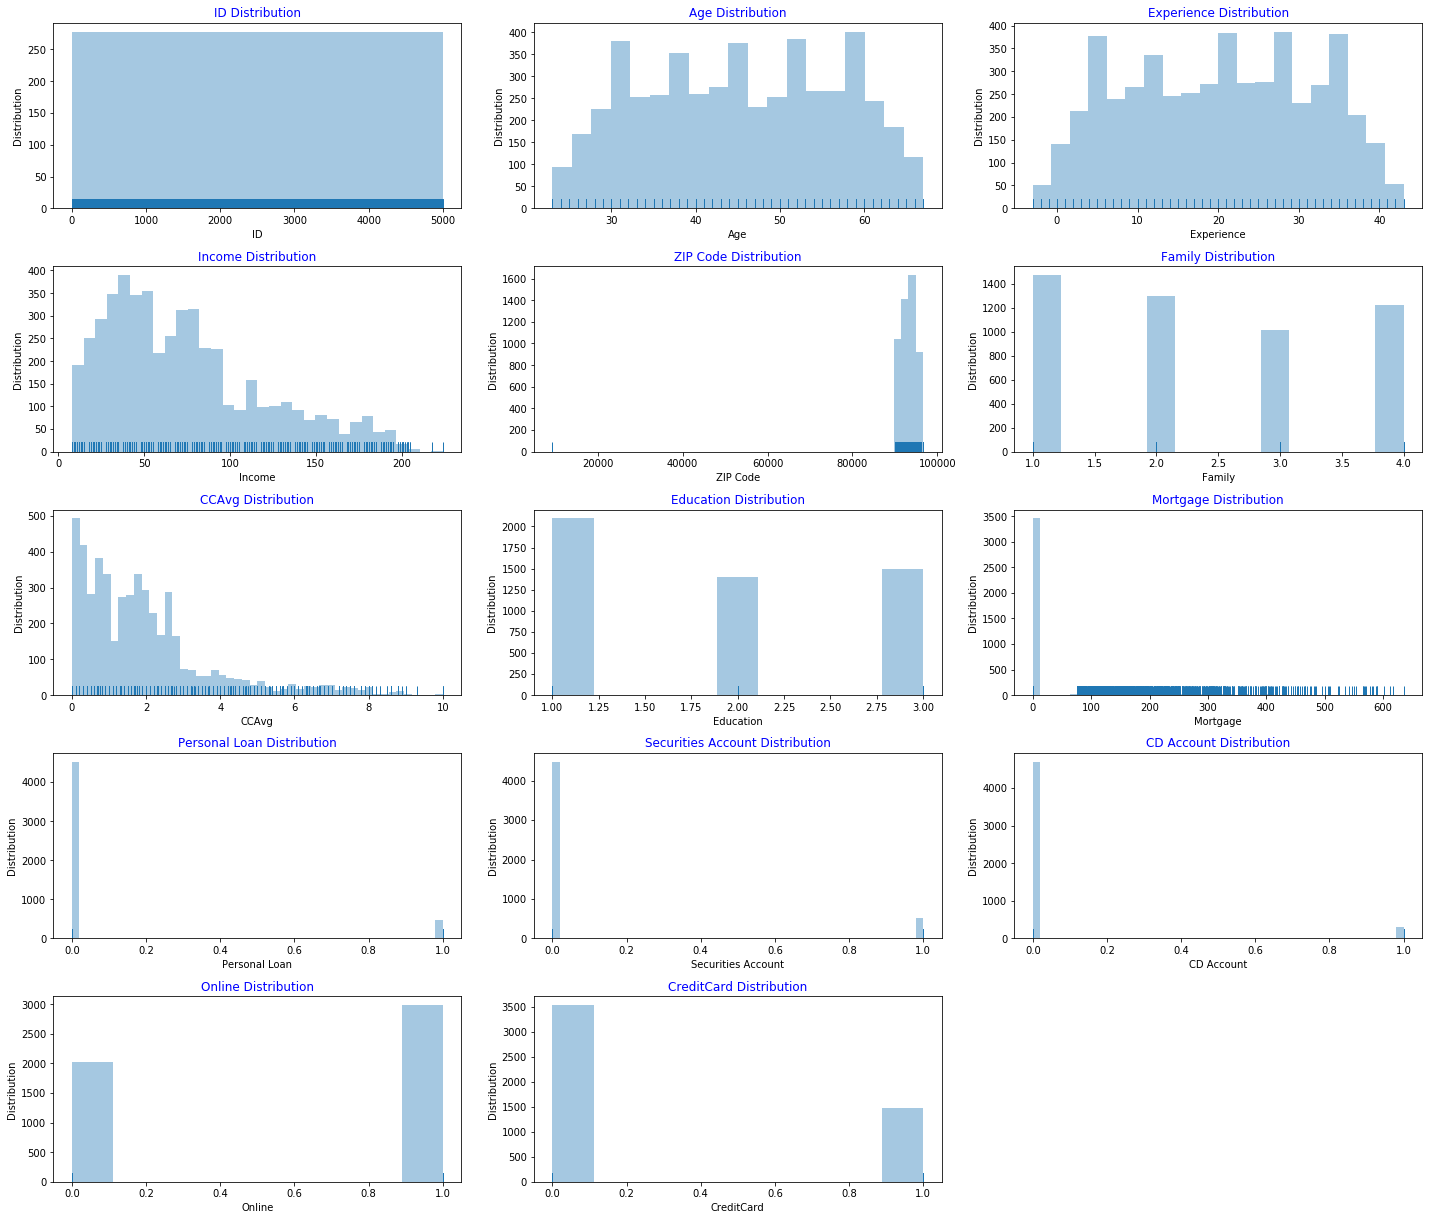

In [37]:
f=plt.figure(figsize=(20,20))
for i, col in enumerate(bank_df.columns):
    ax=f.add_subplot(6,3,i+1)
    sns.distplot(bank_df[col],kde=False,rug=True)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

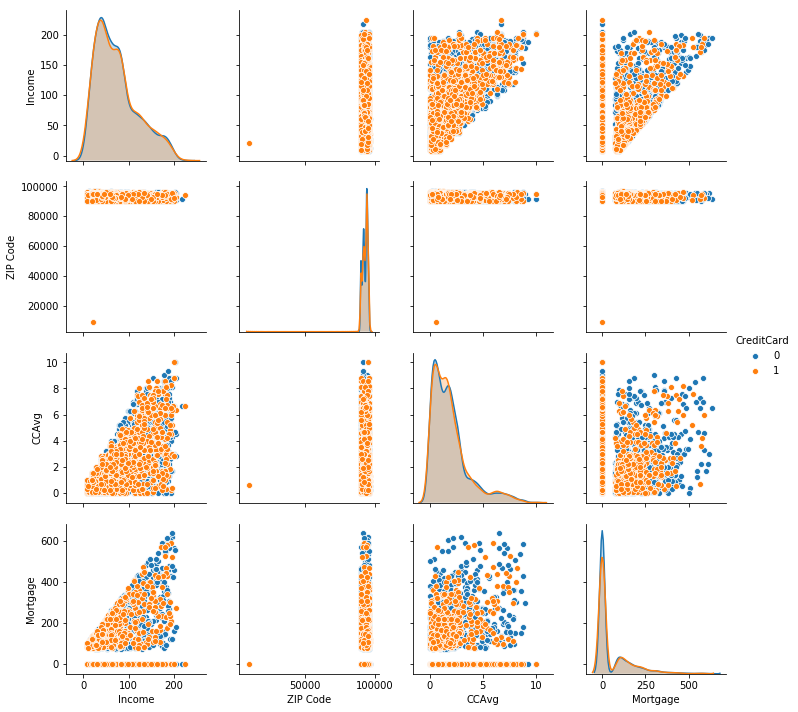

In [101]:
#X=bank_df.drop(columns=['CreditCard','ID'])
#y=bank_df[['CreditCard']]
sns.pairplot(vars=num_col_cont,hue='CreditCard',data=bank_df)

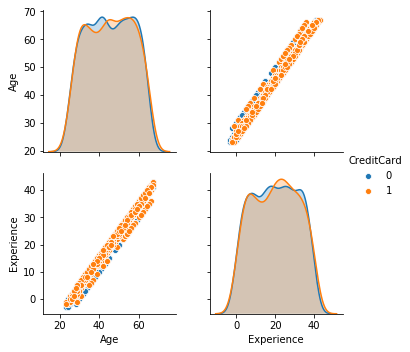

In [98]:
sns.pairplot(vars=num_col_medium,hue='CreditCard',data=bank_df)

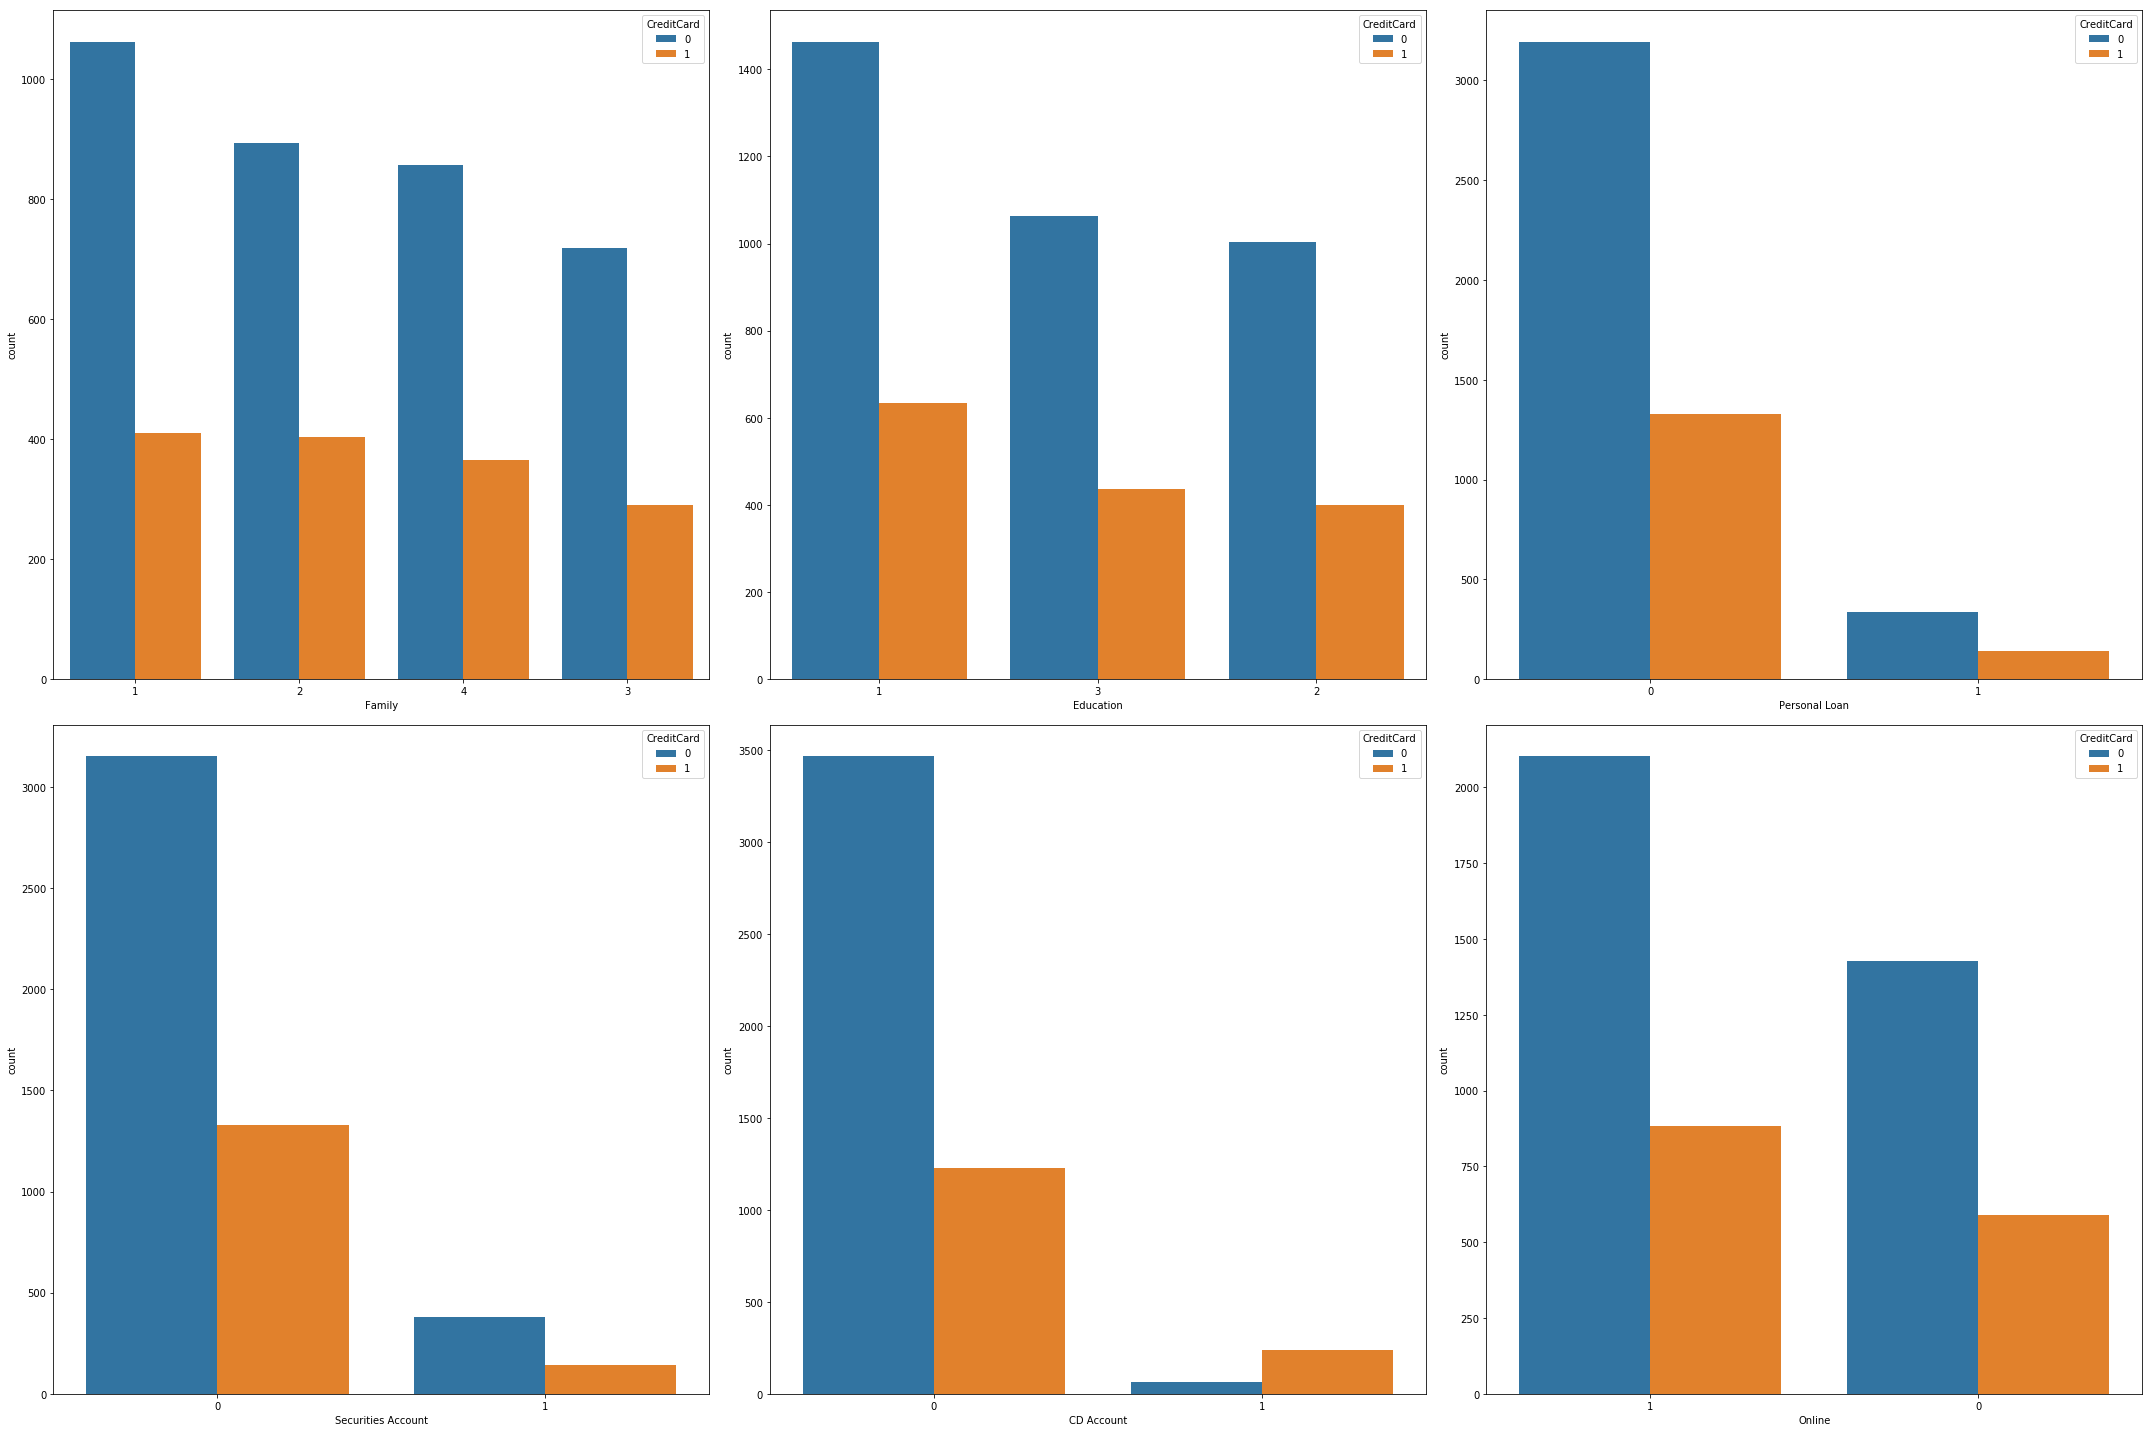

In [103]:


f=plt.figure(figsize=(30,20))
for i, col in enumerate(num_col_disc):
    ax=f.add_subplot(2,3,i+1)
    sns.countplot(bank_df[col], hue=bank_df['CreditCard'], ax=ax,order = bank_df[col].value_counts().index)
    #ax.set_title(col+" Distribution",color='Blue')
    #plt.ylabel('Distribution')
f.tight_layout()

In [ ]:
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    df_trans[col] = df_trans[col].fillna("Miss")
    
def ploting_dist_ratio(df, col, lim=2000):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

    plt.figure(figsize=(20,5))
    plt.suptitle(f'{col} Distributions ', fontsize=22)

    plt.subplot(121)
    g = sns.countplot(x=col, data=df, order=list(tmp[col].values))
    # plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
    g.set_title(f"{col} Distribution\nCound and %Fraud by each category", fontsize=18)
    g.set_ylim(0,400000)
    gt = g.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                       color='black', legend=False, )
    gt.set_ylim(0,20)
    gt.set_ylabel("% of Fraud Transactions", fontsize=16)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)
    for p in gt.patches:
        height = p.get_height()
        gt.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=14) 
        
    perc_amt = (df_trans.groupby(['isFraud',col])['TransactionAmt'].sum() / total_amt * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

    plt.subplot(122)
    g1 = sns.boxplot(x=col, y='TransactionAmt', hue='isFraud', 
                     data=df[df['TransactionAmt'] <= lim], order=list(tmp[col].values))
    g1t = g1.twinx()
    g1t = sns.pointplot(x=col, y='Fraud', data=perc_amt, order=list(tmp[col].values),
                       color='black', legend=False, )
    g1t.set_ylim(0,5)
    g1t.set_ylabel("%Fraud Total Amount", fontsize=16)
    g1.set_title(f"{col} by Transactions dist", fontsize=18)
    g1.set_xlabel(f"{col} Category Names", fontsize=16)
    g1.set_ylabel("Transaction Amount(U$)", fontsize=16)
        
    plt.subplots_adjust(hspace=.4, wspace = 0.35, top = 0.80)
    
    plt.show()

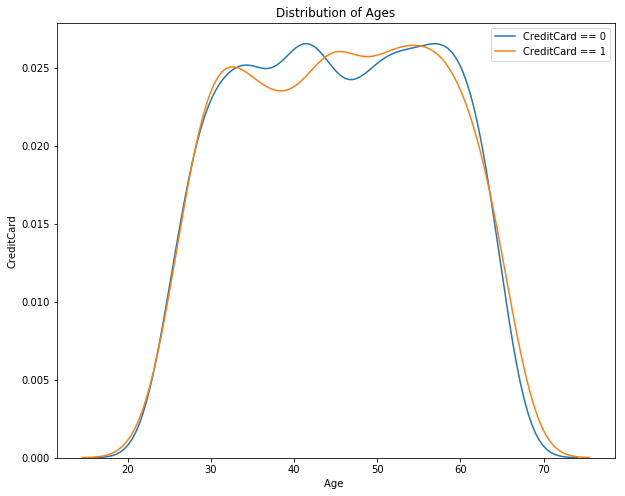

In [73]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(bank_df.loc[bank_df['CreditCard'] == 0, 'Age'] , label = 'CreditCard == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(bank_df.loc[bank_df['CreditCard'] == 1, 'Age'] , label = 'CreditCard == 1')

# Labeling of plot
plt.xlabel('Age '); plt.ylabel('CreditCard'); plt.title('Distribution of Ages');

In [74]:
X=bank_df.drop(columns=['CreditCard','ID'])
y=bank_df[['CreditCard']]

In [88]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [90]:
def fit_predict(train, test, y_train, y_test, scaler, kernel = 'linear', C = 1.0, degree = 3):
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)        
    lr = SVC(kernel = kernel, degree = degree, C = C)
    lr.fit(train_scaled, y_train)
    y_pred = lr.predict(test_scaled)
    print(accuracy_score(y_test, y_pred))

In [91]:
# Kernel tuning
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    print('Accuracy score using {0} kernel:'.format(kernel), end = ' ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), kernel)

Accuracy score using linear kernel: 0.7426666666666667
Accuracy score using poly kernel: 0.7426666666666667
Accuracy score using rbf kernel: 0.7453333333333333
Accuracy score using sigmoid kernel: 0.6406666666666667


In [94]:
# Penalty tuning

for с in np.logspace(-1,3 ,base = 2, num = 6):
    print('Accuracy score using penalty = {0} with rbf kernel:'.format(с), end = ' ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), 'rbf', с)

Accuracy score using penalty = 0.5 with rbf kernel: 0.7453333333333333
Accuracy score using penalty = 0.8705505632961241 with rbf kernel: 0.7453333333333333
Accuracy score using penalty = 1.5157165665103982 with rbf kernel: 0.744
Accuracy score using penalty = 2.6390158215457893 with rbf kernel: 0.742
Accuracy score using penalty = 4.59479341998814 with rbf kernel: 0.7373333333333333
Accuracy score using penalty = 8.0 with rbf kernel: 0.7306666666666667


In [95]:
# Degree of polynomial
for degree in range(2, 6):
    print('Accuracy score using degree = {0} with poly kernel:'.format(degree), end = ' ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), 'rbf', 0.5, degree = degree)

Accuracy score using degree = 2 with poly kernel: 0.7453333333333333
Accuracy score using degree = 3 with poly kernel: 0.7453333333333333
Accuracy score using degree = 4 with poly kernel: 0.7453333333333333
Accuracy score using degree = 5 with poly kernel: 0.7453333333333333


In [96]:
# Grid Search - RBF Kernel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

pipeline = Pipeline([('clf',SVC(kernel='rbf',C=0.5,gamma=0.1 ))])

parameters = {'clf__C':(0.1,0.3,1,3,10,30),
              'clf__gamma':(0.001,0.01,0.1,0.3,1)}

grid_search_rbf = GridSearchCV(pipeline,parameters,n_jobs=-1,cv=5,verbose=1,scoring='accuracy')
grid_search_rbf.fit(X_train,y_train)


print ('RBF Kernel Grid Search Best Training score: %0.3f' % grid_search_rbf.best_score_)
print ('RBF Kernel Grid Search Best parameters set:')
best_parameters = grid_search_rbf.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search_rbf.predict(X_test)

print ("\nRBF Kernel Grid Search - Testing accuracy:",round(accuracy_score(y_test, predictions),4))
print ("\nRBF Kernel Grid Search - Test Classification Report\n",classification_report(y_test, predictions))
print ("\n\nRBF Kernel Grid Search- Test Confusion Matrix\n\n",pd.crosstab(y_test, predictions,rownames = ["Actuall"],colnames = ["Predicted"]))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.8min finished


RBF Kernel Grid Search Best Training score: 0.707
RBF Kernel Grid Search Best parameters set:
	clf__C: 1
	clf__gamma: 0.1

RBF Kernel Grid Search - Testing accuracy: 0.702

RBF Kernel Grid Search - Test Classification Report
               precision    recall  f1-score   support

           0       0.70      1.00      0.82      1055
           1       0.00      0.00      0.00       445

   micro avg       0.70      0.70      0.70      1500
   macro avg       0.35      0.50      0.41      1500
weighted avg       0.49      0.70      0.58      1500



RBF Kernel Grid Search- Test Confusion Matrix

 Predicted     0  1
Actuall           
0          1053  2
1           445  0
